# EXPLOLATORY DATA TO DEFINE THE PROBLEM DEEPLY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### WHAT THIS IS ABOUT

this is a case problem in predicting energy consumption in a competition in Driven Data. for description of the project please check the following site.

https://www.drivendata.org/competitions/55/schneider-cold-start/page/111/

In [2]:
!ls

Untitled.ipynb
cold_start_test.csv
consumption_train.csv
meta.csv
submission_format.csv


In [3]:
meta_data = pd.read_csv('meta.csv')
train_data = pd.read_csv('consumption_train.csv')
test_data = pd.read_csv('cold_start_test.csv')
submission = pd.read_csv('submission_format.csv')

In [5]:
meta_data.head()

,series_id,surface,base_temperature,monday_is_day_off,tuesday_is_day_off,wednesday_is_day_off,thursday_is_day_off,friday_is_day_off,saturday_is_day_off,sunday_is_day_off
0,100003,x-large,low,False,False,False,False,False,True,True
1,100004,x-large,low,False,False,False,False,False,True,True
2,100006,x-small,low,False,False,False,False,False,True,True
3,100008,x-small,low,False,False,False,False,False,True,True
4,100010,x-small,low,False,False,False,False,False,True,True


In [6]:
train_data.head()

,Unnamed: 0,series_id,timestamp,consumption,temperature
0,0,103088,2014-12-24 00:00:00,101842.233424,NaN
1,1,103088,2014-12-24 01:00:00,105878.048906,NaN
2,2,103088,2014-12-24 02:00:00,91619.105008,NaN
3,3,103088,2014-12-24 03:00:00,94473.706203,NaN
4,4,103088,2014-12-24 04:00:00,96976.755526,NaN


In [7]:
test_data.head()

,Unnamed: 0,series_id,timestamp,consumption,temperature
0,0,102781,2013-02-27 00:00:00,15295.740389,17.00
1,1,102781,2013-02-27 01:00:00,15163.209562,18.25
2,2,102781,2013-02-27 02:00:00,15022.264079,18.00
3,3,102781,2013-02-27 03:00:00,15370.420458,17.00
4,4,102781,2013-02-27 04:00:00,15303.103213,16.90


# Visual Representasion of the Data

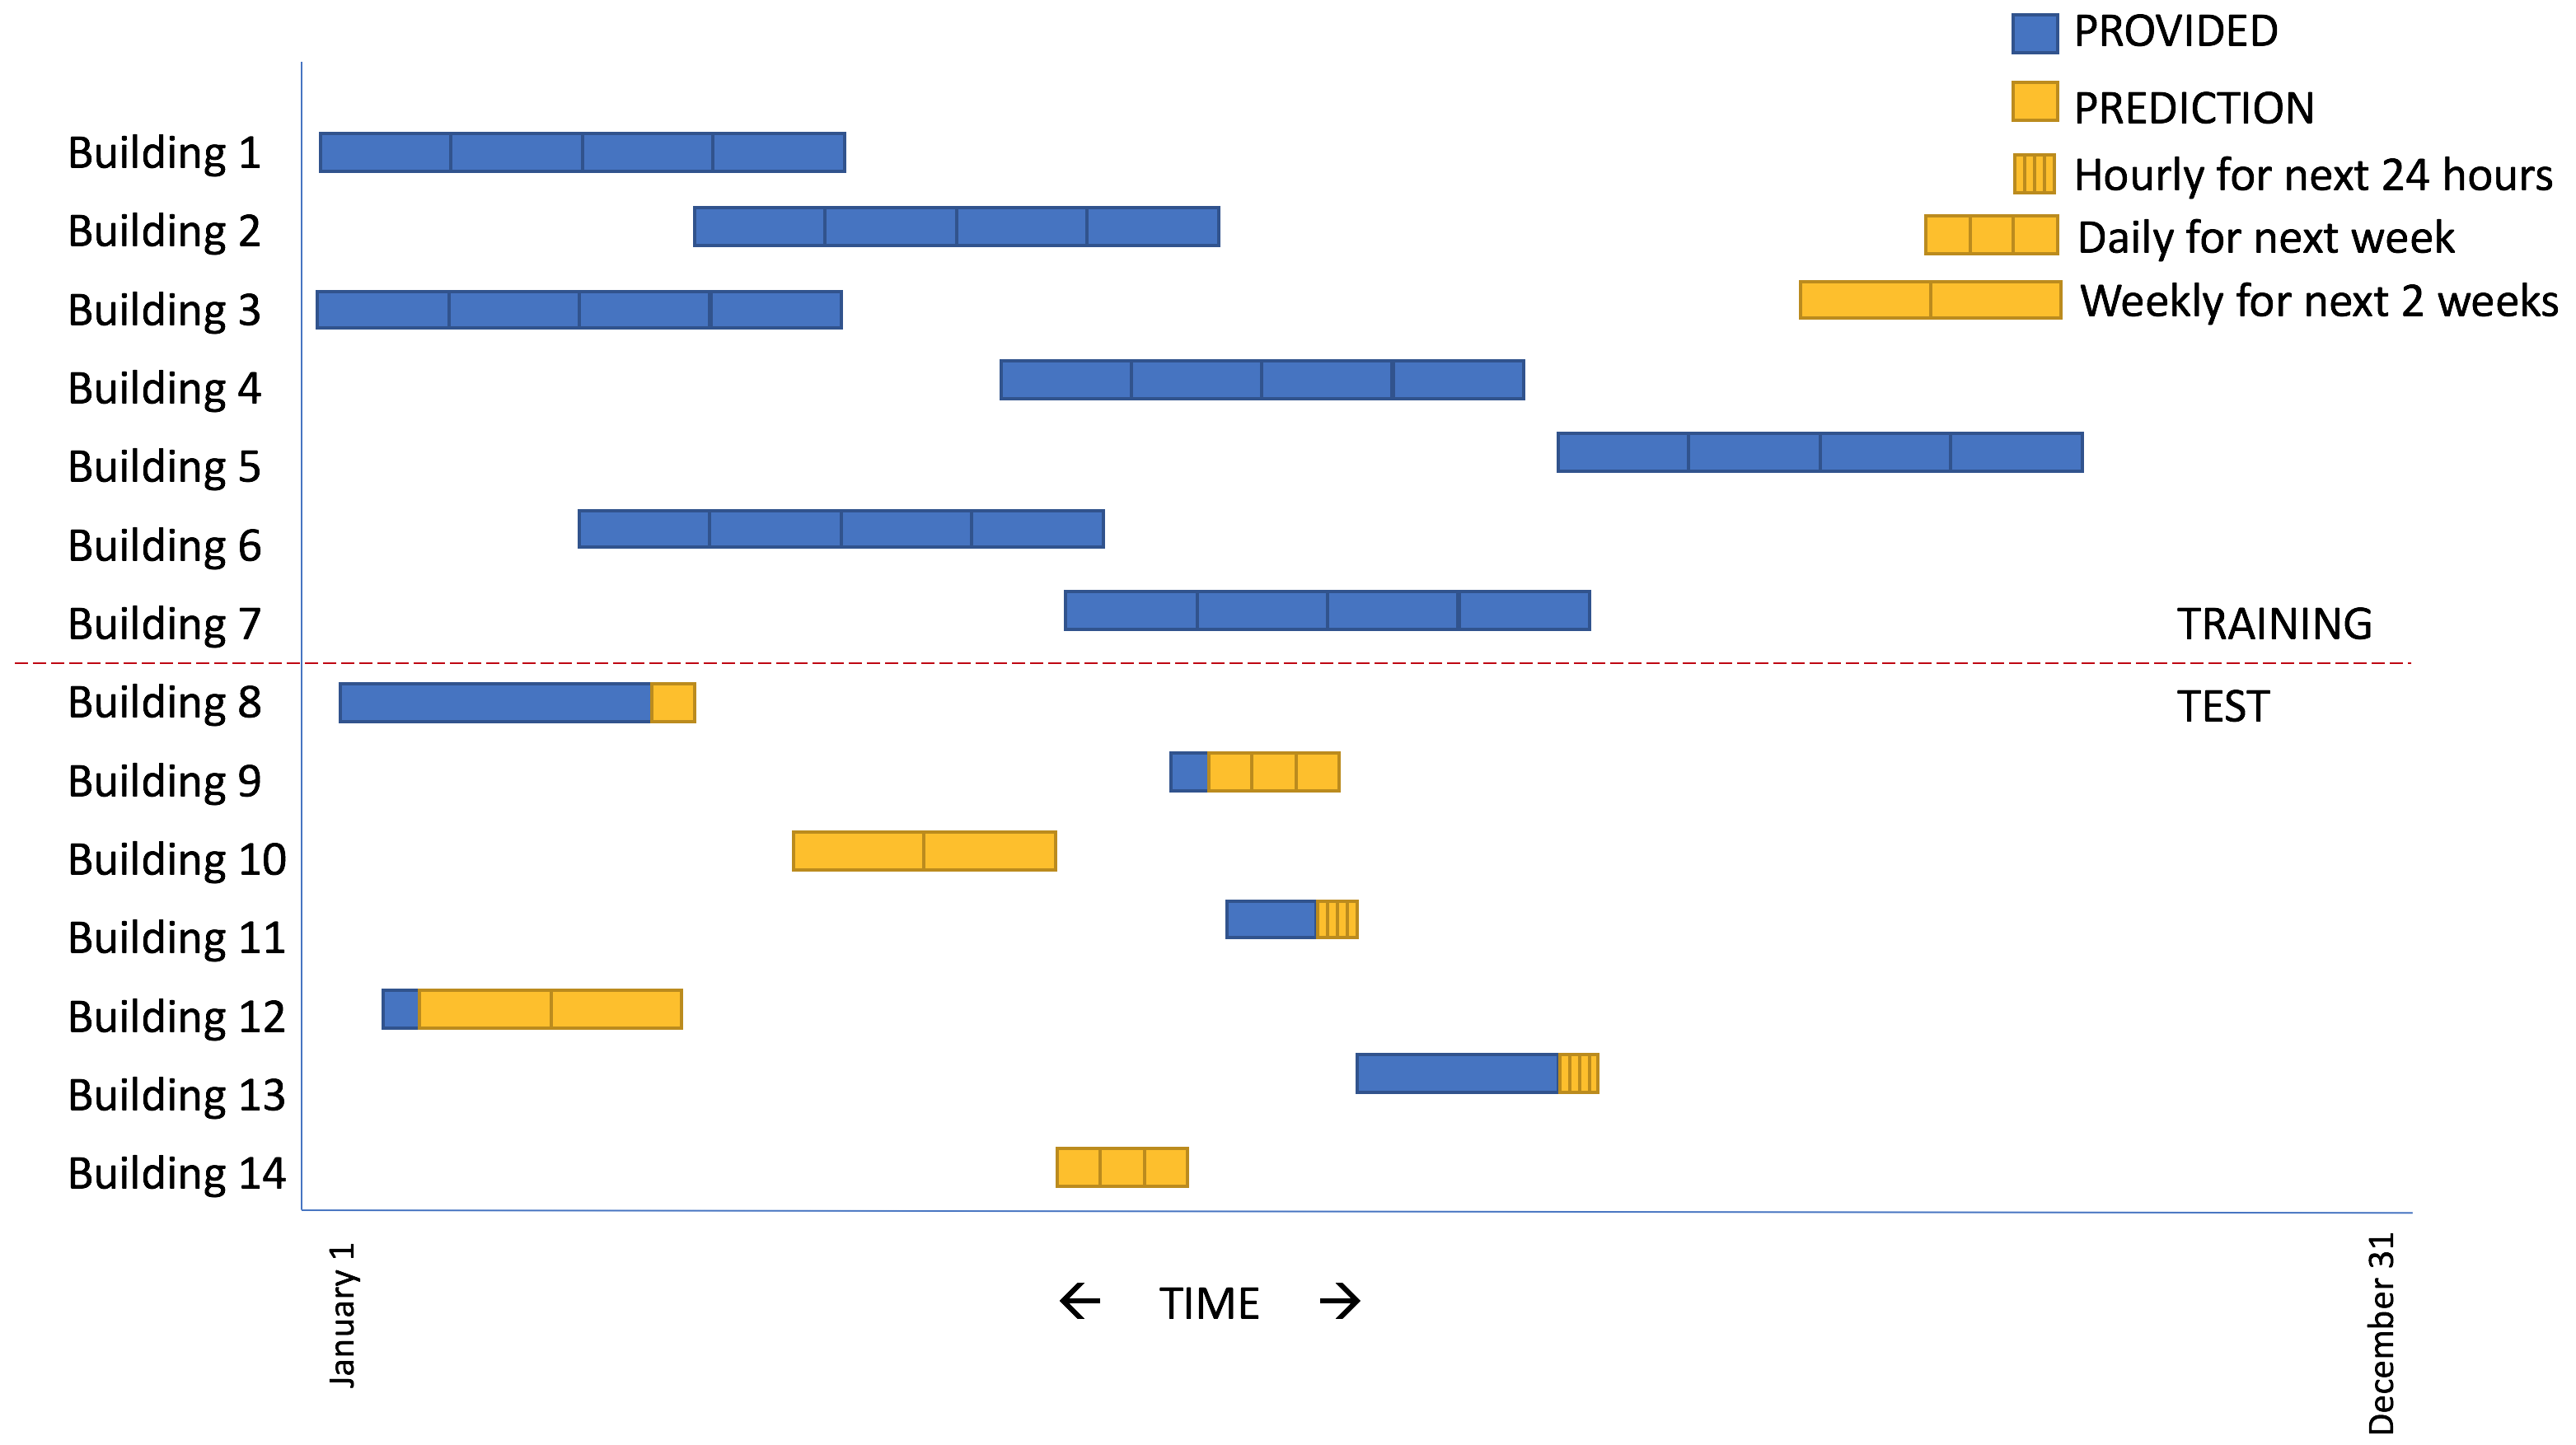

## here we try to predict the energy consumption of the building and the time it is colored in the picture above. for more detail, you can visit in this link :

https://www.drivendata.org/competitions/55/schneider-cold-start/page/111/

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509376 entries, 0 to 509375
Data columns (total 4 columns):
series_id      509376 non-null int64
timestamp      509376 non-null object
consumption    509376 non-null float64
temperature    280687 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.5+ MB


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111984 entries, 0 to 111983
Data columns (total 4 columns):
series_id      111984 non-null int64
timestamp      111984 non-null object
consumption    111984 non-null float64
temperature    67068 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.4+ MB


In [9]:
#Drop Irrelevant Columns

train_data.drop('Unnamed: 0', axis=1, inplace=True)
test_data.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
"""Change the types of timestamp columns and set the index"""

train_data.timestamp = pd.to_datetime(train_data.timestamp)
test_data.timestamp = pd.to_datetime(test_data.timestamp)

train_data.index = train_data.timestamp
test_data.index = test_data.timestamp

### Check for similarity of training data and test data

In [14]:
train_data[['consumption', 'temperature']].describe()

,consumption,temperature
count,5.093760e+05,280687.000000
mean,1.076238e+05,15.188679
std,1.626611e+05,8.987142
min,0.000000e+00,-13.466667
25%,1.542092e+04,8.451190
50%,4.986205e+04,15.163333
75%,1.351661e+05,21.800000
max,2.085109e+06,44.350000


In [15]:
test_data[['consumption', 'temperature']].describe()

,consumption,temperature
count,1.119840e+05,67068.000000
mean,1.585893e+05,15.981019
std,5.282630e+05,7.796996
min,0.000000e+00,-12.212500
25%,1.417107e+04,10.750000
50%,3.869147e+04,16.000000
75%,1.067592e+05,21.600000
max,5.366167e+06,42.000000


Data Look Very similar, let's visualize it just to having fun

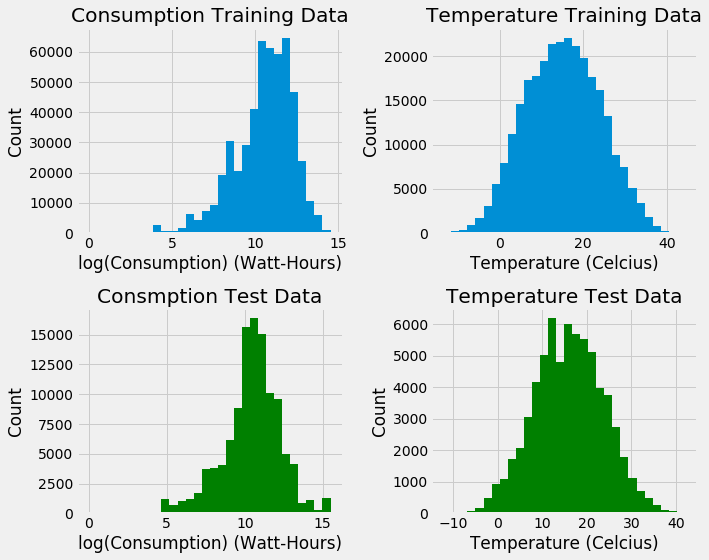

'Here I manipulate consumption data to be add by 1 and then log it, that is for make us can see data better, you should try the resul if didnt do that'

In [76]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.hist(np.log(train_data['consumption']+1), bins=30)
plt.title('Consumption Training Data')
plt.xlabel('log(Consumption) (Watt-Hours)')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
plt.hist(train_data['temperature'].dropna(), bins=30)
plt.title('Temperature Training Data')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
plt.hist(np.log(test_data['consumption']+1).dropna(), color='g', bins=30)
plt.title('Consmption Test Data')
plt.xlabel('log(Consumption) (Watt-Hours)')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
plt.hist(test_data['temperature'].dropna(), color='g', bins=30)
plt.title('Temperature Test Data')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

"""Here I manipulate consumption data to be add by 1 and then log it, that is for make us can see data better, you should try the resul if didnt do that"""

In [46]:
train_data.isnull().sum() #Find Missing Value

series_id           0
timestamp           0
consumption         0
temperature    228689
dtype: int64

In [47]:
train_data.nunique() #Count Unique Value on column

series_id         758
timestamp       40392
consumption    276923
temperature     16526
dtype: int64

In [43]:
test_data.isnull().sum()

series_id          0
timestamp          0
consumption        0
temperature    44916
dtype: int64

In [44]:
test_data.nunique()

series_id        625
timestamp      36648
consumption    81827
temperature     6692
dtype: int64

In [45]:
meta_data.nunique()

series_id               1383
surface                    7
base_temperature           2
monday_is_day_off          2
tuesday_is_day_off         2
wednesday_is_day_off       2
thursday_is_day_off        2
friday_is_day_off          2
saturday_is_day_off        2
sunday_is_day_off          2
dtype: int64

### What we got :

- Here we have 1383 building, 758 in training data and the rest in test data.
- We have 276923 training data, and 81827 test data
- We have many missing value in temperature
- etc

each series_id has a different sample of data, some have samples for 1 day, 2 days, 1 week, etc. but each sample is always in multiples of days, not days 1.5 and so on. so let's look at the sample distribution in each series_id.

In [57]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 509376 entries, 2014-12-24 00:00:00 to 2017-12-18 23:00:00
Data columns (total 4 columns):
series_id      509376 non-null int64
timestamp      509376 non-null datetime64[ns]
consumption    509376 non-null float64
temperature    280687 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 19.4 MB


In [117]:
print('Training Data')
count_train = train_data.groupby('series_id')[['timestamp']].count().rename(columns={'timestamp':'Count (hours)'})
count_train.head()

Training Data


,Count (hours)
series_id,
100003,672
100006,672
100008,672
100017,672
100021,672


In [61]:
672/24

28.0

In [114]:
print('Test Data')
count_test = test_data.groupby('series_id')[['timestamp']].count().rename(columns={'timestamp':'Count (hours)'})
count_test.head()

Test Data


,Count (hours)
series_id,
100004,96
100010,288
100012,240
100020,312
100028,312


In [89]:
print(count_test.nunique()) # N unique value in id_series test

print(count_train.nunique()) # N unique value in id_series train

Count    14
dtype: int64
Count    1
dtype: int64


In [113]:
"""The Distribution of Data who"""

count_test.Count.value_counts()

144    60
288    51
192    50
24     50
336    49
312    48
96     47
120    43
48     42
216    40
72     40
168    39
264    34
240    32
Name: Count, dtype: int64

In [120]:
(count_train/24).rename(columns={'Count (hours)':'Days'}).head()

,Days
series_id,
100003,28
100006,28
100008,28
100017,28
100021,28


In [122]:
(count_test/24).rename(columns={'Count (hours)':'Days'}).head()

,Days
series_id,
100004,4
100010,12
100012,10
100020,13
100028,13


#### In the data test each building is provided with the same number of sample trainings, namely samples in units of hours in 28 days. while in the data test, the number of data samples for each building varies, there are 4 days, 12 days, etc.

#### Remember, Our task is to predict the building's energy consumption in hours, days and weeks in each buildings. here is the sample of submission

In [123]:
submission.head(7)

,pred_id,series_id,timestamp,temperature,consumption,prediction_window
0,0,102781,2013-03-03 00:00:00,19.931250,0.0,daily
1,1,102781,2013-03-04 00:00:00,20.034375,0.0,daily
2,2,102781,2013-03-05 00:00:00,19.189583,0.0,daily
3,3,102781,2013-03-06 00:00:00,18.397917,0.0,daily
4,4,102781,2013-03-07 00:00:00,20.762500,0.0,daily
5,5,102781,2013-03-08 00:00:00,19.800000,0.0,daily
6,6,102781,2013-03-09 00:00:00,20.466667,0.0,daily


In [125]:
submission.shape

(7529, 6)

### STATE THE PROBLEM AND THINK ABOUT THE NEXT STEP

We have explored the data in understanding the problems we are facing. the problems we face are:

""We have electricity consumption data for each building every hour, there are 1383 buildings where 758 buildings as our training sample are used as input models. The remaining 625 are buildings that we will predict their electricity consumption in the hour, daily and weekly periods""

""Training data provides 28 days of electricity consumption in a matter of hours. while the data test provided a sample of electricity consumption in each building in varying amounts is 4 days, 12 days, etc.""

What do you think is the next step, how will we manipulate the data to be input as our modeling later?
in my mind:

first, we can create 3 models in which each data predicts data in hours, days and weeks. the drawback in my opinion this method will make us lose a lot of information because our data will be a little because it is divided into 3 parts.

second we make 1 model to predict the amount of electricity consumption in any period. in my opinion this method is better than the previous metedo.

but why don't we try to try these two methods, just to experiment and have fun. but I will first try the second method because my hypothesis is that the method is better relative to the first.

I am open to those of you who want to share their ideas and join in to participate in this competition. because I will need hours and even days to complete this project.

See you next day Guys ...

==============================================================================================================================

kita telah melakukkan explorasi data dalam memahami masalah yang sedang kita hadapi. masalah yang kita hadapi adalah :

"Kita memiliki data konsumsi listrik setiap gedung setiap jam, terdapat 1383 gedung dimana 758 gedung sebagai sampel training kita untuk dijadikan input model. dan sisanya sebanyak 625 adalah gedung yang akan kita prediksi konsumsi listriknya dalam periode jam, harian, dan mingguan

Data training memberikan sampel konsumsi listrik selama 28 hari dalam hitungan unit jam. sedangkan pada test data di sediakan sampel konsumsi listrik pada setiap gedung dalam jumlah yang bervariasi adalah 4 hari, 12 hari, dsb."

Apa menurut kalian langkah selanjutnya, bagaimana kita akan memanipulasi data untuk dijadikan input sebagai pemodelan kita nantinya?
in my mind :

pertama, kita bisa membuat 3 model yang dimana setiap data memprediksi data dalam periode jam, hari, dan minggu. kekurangannya menurut saya metode ini akan membuat kita kehilangan banyak informasi karena data kita akan menjadi sedikit karena di bagi menjadi 3 bagian.

kedua kita kita membuat 1 model untuk memprediksi jumlah konsumsi listrik dalam periode apapun. menurut saya metode ini lebih baik dari metedo yang sebelumnya.

tapi mengapa kita tidak mencoba untuk mencoba ke dua metode tersebut, hanya untuk bereksperimen dan bersenang-senang. tapi saya akan terlebih dahulu mencoba metode ke 2 karena hipotesis saya metode tersebut lebih baik relatif yang pertama.

See you next day Guys...